# **Cargando data de imágenes**

In [2]:
import glob
import face_recognition
import numpy as np
import pandas as pd

path = r'lfw/**/*.jpg'
files = glob.glob(path, recursive=True)

ModuleNotFoundError: No module named 'face_recognition'

In [3]:
!jupyter kernelspec list


Available kernels:
  python3    C:\Users\USER\anaconda3\share\jupyter\kernels\python3


In [10]:
import json
encoded_faces = { }
for file in files: 
    try:
        encoded_faces[file]= (face_recognition.face_encodings(face_recognition.load_image_file( file ))[0]).tolist()        
    except:
        continue

jso = json.dumps(encoded_faces) 
js =  open('encoded_data.json','w')
js.write(jso)
js.close()

In [11]:
import random
def sample_distances(data, N):
    dists = []
    for _ in range(N):
        ids = [random.choice(list(data)) for i in range(2)]
        dists.append(np.linalg.norm(np.array(data[ids[0]]) - np.array(data[ids[1]]) ) )
    return dists

In [12]:
import matplotlib.pyplot as plt

random_selections =  sample_distances(encoded_faces, len(encoded_faces))

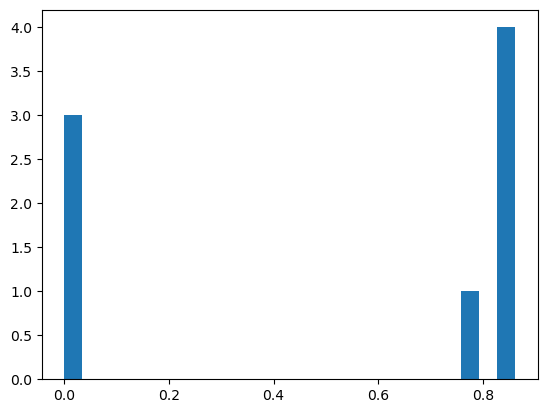

In [13]:
plt.hist(random_selections,bins = 25)
plt.show()

In [14]:
encoded_faces

{'lfw\\Dwayne_Johnson\\Dwayne_Johnson_001.jpg': [-0.04619656875729561,
  0.11928385496139526,
  0.08407885581254959,
  -0.12340566515922546,
  -0.06041045859456062,
  -0.009498918429017067,
  -0.04074762389063835,
  -0.06900696456432343,
  0.17414264380931854,
  -0.04972238093614578,
  0.2606761157512665,
  0.020920105278491974,
  -0.19220802187919617,
  -0.08614736050367355,
  0.07419764250516891,
  0.12580452859401703,
  -0.18217770755290985,
  -0.11162127554416656,
  -0.0805325135588646,
  -0.0581231452524662,
  0.03367391228675842,
  -0.05131855234503746,
  0.11068592220544815,
  0.029726296663284302,
  -0.14039689302444458,
  -0.3068065047264099,
  -0.1282758116722107,
  -0.12178388983011246,
  0.10612819343805313,
  -0.14252085983753204,
  -0.013953651301562786,
  -0.10980457067489624,
  -0.21341806650161743,
  -0.06808247417211533,
  -0.021787412464618683,
  0.04736223816871643,
  -0.0528685599565506,
  -0.10141105949878693,
  0.1626795530319214,
  -0.019269827753305435,
  -0.15

# **Funciones de búsqueda**

In [15]:
import heapq as hq

def knn_search(Q, k, data):
    result = []
    for idx in data:
        if idx == Q:
            continue
        try:             
            dist = np.linalg.norm(np.array(data[idx]) - np.array(data[Q]))            
            hq.heappush( result, (dist,idx) )        
        except:
            continue
    return hq.nsmallest(k, result)

In [16]:
def range_search(Q, r, data):
    result = []
    for idx in data:   
        if idx == Q: 
            continue
        try:
            dist = np.linalg.norm(np.array(data[idx]) - np.array(data[Q]))            
            if  dist < r:
                result.append((dist, idx))
        except:
            continue
    return result

# Ejecución

In [17]:
from PIL import Image
import time
import shutil
import os 

knn_result = knn_search("lfw/Lon_Kruger/Lon_Kruger_0002.jpg", 10, encoded_faces)

target = r'images_result/'
for val, id in (knn_result):    
    print(os.path.basename(id),  val)

In [18]:
range_result = range_search("lfw/Lon_Kruger/Lon_Kruger_0002.jpg", 0.6, encoded_faces)

for val, id in range_result:
    print(os.path.basename(id), val)